In [3]:
import sys
import os
import os.path as op


from glob import glob
import ujson
from PIL import Image
indexed_cards_dir = '/media/jakob/bigdata/index_data/'
from tqdm import tqdm

In [4]:
%load_ext autoreload
%autoreload 2
sys.path.append(os.path.abspath('/home/jakob/dev/htwmusik/catconv/'))
import catconv.stabi as sb
import catconv.operations as co

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Convert cards with index

In [5]:
def indexed_catalogs(catalogs):
    for cat in catalogs:
        with open(cat, 'rb') as index_file:
            json_data = ujson.load(index_file)
            yield json_data
            
def simple_id(path):
    data_dir, cat_name, batch_name, page_name = sb.split_path(path)
    return batch_name + page_name[4:]

In [6]:
def crop_resize(src, target):
    """rescale image to 300dpi"""
    return ['convert', src, '-crop' ,'-0-70', '-resize', '150%', target]

In [8]:
indexed_cards_json = glob(op.join(indexed_cards_dir, '*.json'))
catalogs = indexed_catalogs(indexed_cards_json)
for catalog in catalogs:
    print catalog['name']
    print 'loading...'
    old = sb.load_catalog(op.join('/media/jakob/bigdata/old_cat', catalog['name']),selection={'ext':'.tif'})
    print 'pages:', len(old['pages'])
    
    to_png_conv = {'to_cat':'/media/jakob/bigdata/train/','ext':'.jpg'}
    indexed_pages = [page for page in old['pages'] if simple_id(sb.convert_page_path(page,{})['path']) in catalog['index']]
    old_to_index =  [(page, sb.convert_page_path(page,to_png_conv)) for page in indexed_pages]
    print len(indexed_pages)
    print 'processing'
    for pair in tqdm(old_to_index):
        co.convert_to_png(*pair,conversion_generator=crop_resize)

SD
loading...
pages: 10214
294
processing


100%|██████████| 294/294 [00:25<00:00, 11.00it/s]


SB
loading...
pages: 191385
4432
processing


100%|██████████| 4432/4432 [07:22<00:00,  9.94it/s]


S
loading...
pages: 734323
18436
processing


100%|██████████| 18436/18436 [38:47<00:00,  7.92it/s]


SE
loading...
pages: 28984
780
processing


100%|██████████| 780/780 [01:13<00:00, 10.95it/s]


SC
loading...
pages: 33048
797
processing


100%|██████████| 797/797 [01:14<00:00, 10.64it/s]


In [53]:
test_page = old['pages'][0]

In [54]:
test_page

{'path': u'/media/jakob/bigdata/old_cat/SE/SE001/TIF/00000001.tif'}

In [155]:
jobs = [crop_resize(fpage['path'], tpage['path']) for fpage, tpage in old_to_index]

In [173]:
for pair in old_to_index:
    co.convert_to_png(*pair,conversion_generator=crop_resize)

In [70]:

get_size = lambda img: Image.open(img['path']).size
sizes = map(get_size, indexed_pages)

In [96]:
        
sized = np.array(list(sizes), np.float32)

In [104]:
print indexed_pages[np.argmax((sized[:,0] / sized[:, 1]))]
print indexed_pages[np.argmin((sized[:,0] / sized[:, 1]))]

{'path': u'/media/jakob/bigdata/old_cat/SE/SE002/TIF/00000382.tif'}
{'path': u'/media/jakob/bigdata/old_cat/SE/SE001/TIF/00000001.tif'}


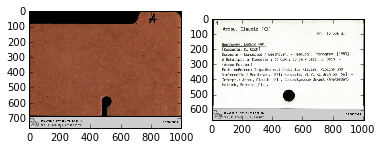

In [106]:
plt.subplot(121)
plt.imshow(plt.imread('/media/jakob/bigdata/old_cat/SE/SE001/TIF/00000001.tif'))
plt.subplot(122)
plt.imshow(plt.imread('/media/jakob/bigdata/old_cat/SE/SE002/TIF/00000382.tif'))


In [113]:
!mkdir -p /media/jakob/bigdata/train/SE/SE001

In [135]:
w, h = get_size(indexed_pages[0])
w * 1.5, h * 1.5
70 * 1.5

105.0

In [154]:
crop_resize(*old_to_index[0])

['convert',
 {'path': u'/media/jakob/bigdata/old_cat/SE/SE001/TIF/00000001.tif'},
 '-crop -0-70',
 '-resize 150%',
 {'path': u'/media/jakob/bigdata/train/SE/SE001/00000001.png'}]

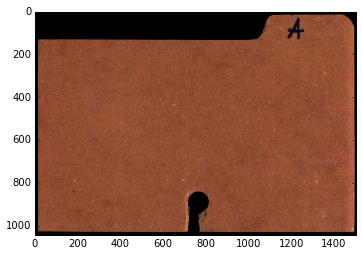

In [149]:
plt.imshow(plt.imread('/media/jakob/bigdata/train/SE/SE001/00000001.png'))

In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

(array([ 639.,  122.,   18.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 670. ,  679.6,  689.2,  698.8,  708.4,  718. ,  727.6,  737.2,
         746.8,  756.4,  766. ]),
 <a list of 10 Patch objects>)

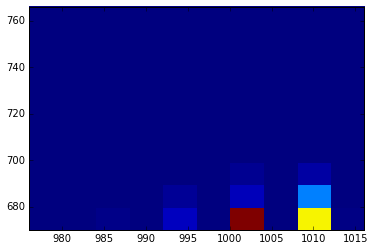

In [87]:
# plt.subplot(121)
plt.hist2d(sized[:,0],sized[:,1])
# plt.subplot(122)
plt.hist(sized[:,1])

## Sample text lines

In [176]:
with open('/media/jakob/bigdata/train/SB.json', 'rb') as json_cat:
    catalog = ujson.load(json_cat)

In [178]:
import random


In [196]:
r = random.Random()
r.seed('sda')
r.sample

<bound method Random.getstate of <random.Random object at 0x16db7880>>

In [202]:
def get_sample(catalog, N=800):
    rnd = random.Random()
    rnd.seed(catalog['name'])
    lines = []
    for page in catalog['pages']:
        for line in page['lines']:
            lines.append(op.join(page['path'],line['name']))
    lines = rnd.sample(sorted(lines), N)
#     random.shuffle(lines,random=rnd.)
    return lines
get_sample(catalog)

[u'SB138/00000540/010002',
 u'SB002/00000687/010002',
 u'SB118/00000689/010003',
 u'SB208/00000210/010004',
 u'SB222/00000161/010005',
 u'SB186/00000303/010003',
 u'SB215/00001017/010002',
 u'SB041/00000648/010001',
 u'SB134/00000885/010003',
 u'SB058/00000002/010002',
 u'SB205/00000522/010001',
 u'SB210/00001002/010007',
 u'SB173/00000706/010003',
 u'SB077/00000410/010001',
 u'SB232/00000450/010001',
 u'SB064/00000209/010001',
 u'SB085/00000592/010004',
 u'SB148/00000528/01000b',
 u'SB029/00000548/010001',
 u'SB227/00000515/010007',
 u'SB149/00000069/010005',
 u'SB211/00000345/010006',
 u'SB198/00000696/010002',
 u'SB066/00000319/010003',
 u'SB026/00000416/010003',
 u'SB045/00000273/010004',
 u'SB087/00000519/010001',
 u'SB039/00000309/010006',
 u'SB033/00000084/010005',
 u'SB173/00000254/010005',
 u'SB194/00000456/010008',
 u'SB130/00000578/010006',
 u'SB150/00000816/010005',
 u'SB010/00000410/010010',
 u'SB228/00000054/010006',
 u'SB055/00000541/010003',
 u'SB186/00000604/010006',
 

## Export Groundtruth

In [207]:
import tinydb
from tinydb import Query
db = tinydb.TinyDB('../ocr-web-prototype/index_manual.json')

In [208]:
Page = Query()

In [209]:
tlines = db.table('lines')

In [9]:
{line['id']: line['gt'] for line in tlines.all()}

NameError: name 'tlines' is not defined

In [7]:

line_texts = [(op.join(page['name'], (page['index_name'][0])), page['text'][0]) 
 for page in db.search(Page.name != None)
 if 'index_name' in page]

In [8]:
import codecs
import shutil
export = '/media/jakob/bigdata/train/SB_indexed'
catalog = '/media/jakob/bigdata/train/SB'
print len(line_texts)
for line, text in line_texts:
    gt_file  = op.join(export,  line + '.gt.txt')
    line_src = op.join(catalog, line + '.bin.png' )
    line_to  = op.join(export,  line + '.dew.png' )
    if not op.isdir(op.dirname(line_to)):
        os.makedirs(op.dirname(line_to))
    shutil.copyfile(line_src,line_to)
#     print gt_file
    with codecs.open(gt_file, 'wb', encoding='utf8') as gt:
        gt.write(text)

533


In [53]:
!cat /media/jakob/bigdata/train/SB/SB001/00000554/010001.gt.txt
# !ls -la /media/jakob/bigdata/train/SB/SB001/00000001/
!eog /media/jakob/bigdata/train/SB/SB001/00000554/010001.bin.png

Abrányi, Kornél

In [30]:
db.search(Page.name != None)

[{u'index_name': [u'010001'], u'name': u'SB001/00000001', u'text': [u'A A']},
 {u'index_name': [u'010001'],
  u'name': u'SB074/00000637',
  u'text': [u'Frotscher, Gotthold']},
 {u'index_name': [u'010001'],
  u'name': u'SB075/00000003',
  u'text': [u'Fuchs, Albert']},
 {u'index_name': [u'010001'],
  u'name': u'SB075/00000161',
  u'text': [u'Fuehrer, Rudolf H.']},
 {u'index_name': [u'010001'],
  u'name': u'SB001/00000476',
  u'text': [u'Abraham, Gerald [Mitarb.]']},
 {u'index_name': [u'010001'],
  u'name': u'SB236/00000319',
  u'text': [u'Zeno, Apostolo']},
 {u'index_name': [u'010001'],
  u'name': u'SB236/00000346',
  u'text': [u'Zepler, Bogumil']},
 {u'index_name': [u'010001'],
  u'name': u'SB236/00000269',
  u'text': [u'Sinfonietta']},
 {u'index_name': [u'010001'],
  u'name': u'SB236/00000396',
  u'text': [u'Zesso, Giovanni Battista']},
 {u'index_name': [u'010003'],
  u'name': u'SB236/00000446',
  u'text': [u'Ziegler, Hans. - 50 Jahre Basler Orchester-Gesellschaft.']},
 {u'index_name':